In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd


df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/DataMining/lab3_data.xlsx");

df = df.dropna()
print(df.shape);
print(df)


# Display the numerical dataset
print(list(df.columns))
print(len(df.columns))







(506, 15)
     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     TAX  PTRATIO       B  LS


'''
3. Train a multiple linear regression model to predict MEDV considering all the
predictors.

a. Fit the model using only 70% of the data. The remaining 30% will be used as
a testing data set. Hint: use sklearn.model_selection.train_test_split function to
generate the data sets.

b. Interpret one of the estimated model coefficients and the R-squared.

c. Compare the model to the one fitted in 2.c.

d. Evaluate the model performance on the testing dataset. For this, compare
predicted values vs residuals and responses vs predicted values for both data
sets.

e. Calculate the mean squared error (MSE) for both train and test set. Comment
on it. Hint: use mean_squared_error function

'''

In [63]:
#1.Build a simple linear regression to predict MEDV (house prices) using the RM (number of rooms) as a predictor.
#a. Check the assumptions.

#b. Interpret the estimated coefficient associated to RM

import statsmodels.formula.api as smf
#mod1 = smf.ols("MEDV ~ RM ",data = df)
mod1 = smf.ols("MEDV ~ CRIM+ ZN+  C(CHAS)+ NOX+ RM+  DIS+ C(RAD) + TAX+ PTRATIO+ B+LSTAT",data = df)
  #'CRIM', 'ZN', 'CHAS', 'NOX', 'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
  #'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

  #import statsmodels.api as smf


mod1_res = mod1.fit()
#print("w111")
mod1_res.summary()
#print("w222")
# R-squared:	0.947  Adj. R-squared:	0.557 AIC:	3083 BIC:	4968
# Intercept	27.5000 p=0



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     81.08
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.10e-133
Time:                        22:09:14   Log-Likelihood:                -1489.7
No. Observations:                 506   AIC:                             3017.
Df Residuals:                     487   BIC:                             3098.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1757      5.399      6.515      0.000      24.567      45.784
C(CHAS)[T.1]     2.5593      0.856      2.990      0.003       0.878       4.241
C(RAD)[T.2]      1.5671      1.459      1.074      0.283      -1.300       4.435
C(RAD)[T.3]      4.6605      1.331      3.501      0.001       2.045       7.276
C(RAD)[T.4]      2.6052      1.182      2.205      0.028       0.284       4.927
C(RAD)[T.5]      2.9000      1.204      2.408      0.016       0.534       5.266
C(RAD)[T.6]      1.1244      1.451      0.775      0.439      -1.726       3.975
C(RAD)[T.7]      4.8734      1.567      3.110      0.002       1.795       7.952
C(RAD)[T.8]      4.7944      1.482      3.236      0.001       1.883       7.706
C(RAD)[T.24]     7.3362      1.749      4.194      0.000       3.899      10.774
CRIM            -0.1094      0.033     -3.355      0.001      -0.173      -0.045
ZN               0.0541      0.014      3.891      0.000       0.027       0.081
NOX            -17.1366      3.605     -4.754      0.000     -24.219     -10.054
RM               3.6519      0.411      8.887      0.000       2.845       4.459
DIS             -1.5711      0.189     -8.312      0.000      -1.943      -1.200
TAX             -0.0081      0.004     -2.312      0.021      -0.015      -0.001
PTRATIO         -0.9691      0.143     -6.765      0.000      -1.251      -0.688
B                0.0094      0.003      3.537      0.000       0.004       0.015
LSTAT           -0.5275      0.047    -11.138      0.000      -0.621      -0.434
==============================================================================
Omnibus:                      184.119   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.392
Skew:                           1.555   Prob(JB):                    8.93e-188
Kurtosis:                       8.584   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
df[['CRIM', 'ZN','CHAS', 'NOX', 'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]]

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0,0.573,6.593,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,0,0.573,6.120,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,0,0.573,6.976,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,0,0.573,6.794,2.3889,1,273,21.0,393.45,6.48


<function matplotlib.pyplot.show(close=None, block=None)>

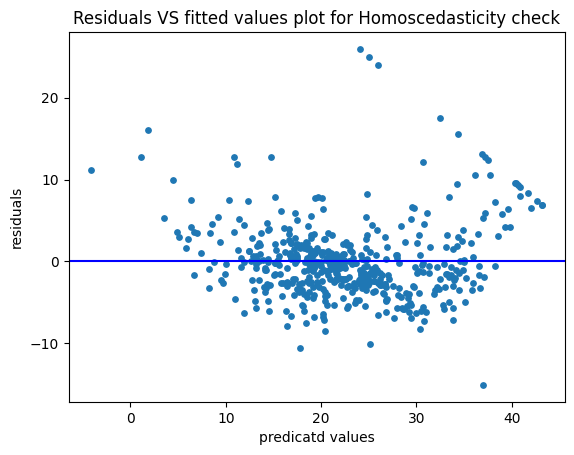

In [65]:
ypred = mod1_res.predict(df[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

import numpy as np
from matplotlib import pyplot as plt

residuals = np.array(df['MEDV']-np.array(ypred))
p = plt.scatter(ypred,residuals,s=15)
plt.xlabel("predicatd values")
plt.ylabel("residuals")
plt.axhline(y=0.0, color="b",linestyle="-")
plt.title("Residuals VS fitted values plot for Homoscedasticity check")
plt.show


In [76]:

#2. Fit a multiple linear regression model to predict MEDV.
#a. Is there any categorical variable?
from patsy import dmatrices
y,x = dmatrices("MEDV ~ RM + CRIM+ ZN+ CHAS+ NOX+ RM+ DIS+ RAD + TAX+ PTRATIO+ B+LSTAT",df, return_type="dataframe")
medv = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

medv["MEDV_Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
medv["Feature"] = x.columns
medv.round(2)



,MEDV_Factor,Feature
0,579.26,Intercept
1,1.83,RM
2,1.79,CRIM
3,2.24,ZN
4,1.06,CHAS
5,3.78,NOX
6,3.44,DIS
7,6.86,RAD
8,7.27,TAX
9,1.76,PTRATIO


In [82]:
features=["CRIM", "ZN", "CHAS", "NOX", "RM",  "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
features=["CRIM", "ZN", "CHAS", "NOX", "RM",  "DIS",   "PTRATIO", "B", "LSTAT"]
x = df.loc[:, features].values
#x = df
# Standardizing the features
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

[[-1.4484306   0.66548039  0.22572614 ...  0.43271377  0.4072906
   0.023852  ]
 [-0.96348414 -0.17610367 -0.48314026 ...  0.64967338 -0.24379431
   0.18629454]
 [-1.57797756  0.3902712  -0.07265351 ...  0.54356956 -0.20180566
   0.33660566]
 ...
 [-0.07107239  0.40304288 -0.60079506 ... -0.55117255  0.42692592
  -0.19841259]
 [ 0.02404335  0.23762785 -0.65780774 ... -0.49083782  0.44746421
  -0.15789492]
 [ 0.3942438  -0.25546579 -1.05375858 ... -0.23897943  0.79005443
  -0.26224663]]
[0.4076311  0.54918656 0.66609513 0.7589525  0.84191417 0.90972854
 0.94992539 0.97963409 1.        ]


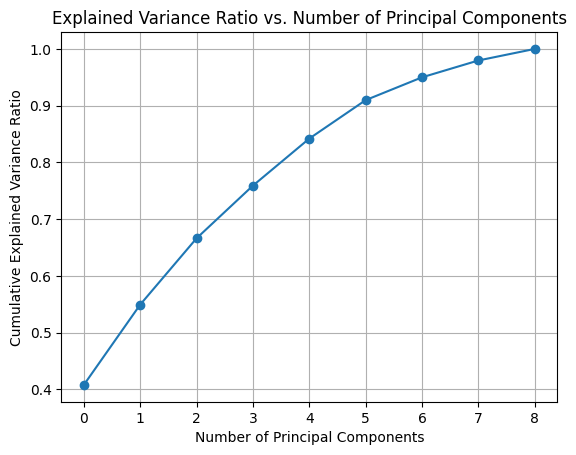

In [84]:

from sklearn.decomposition import PCA

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(x)
print(principalComponents)
# Explained variance ratio
explained_variance_ratio =np.cumsum(pca.explained_variance_ratio_)

print(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

        PC1       PC2       PC3       PC4       PC5       PC6     CRIM
0 -1.448431  0.665480  0.225726 -0.455553  0.920104  0.153938  0.00632
1 -0.963484 -0.176104 -0.483140 -0.434685  0.007052 -0.115957  0.02731
2 -1.577978  0.390271 -0.072654 -1.158450 -0.509681 -0.035870  0.02729
3 -1.711775 -0.072119 -0.254504 -0.965680 -0.843861 -0.125827  0.03237
4 -1.637488 -0.046383 -0.203011 -0.966150 -0.825656 -0.082061  0.06905


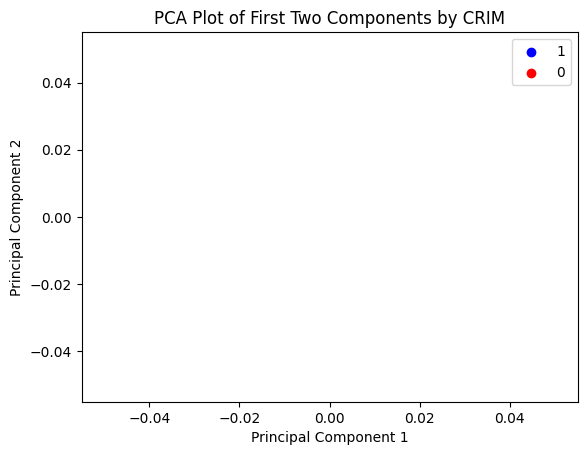

In [87]:

y = df['CRIM']

# Create a DataFrame with principal components and gender
pc_df = pd.DataFrame(data=principalComponents[:, :6], columns=['PC1', 'PC2','PC3','PC4', 'PC5','PC6'])

pc_df['CRIM'] = y
print(pc_df.head())

# Plot
fig, ax = plt.subplots()
colors = {1: 'blue', 0: 'red'}
for check, color in colors.items():
    check_data = pc_df[pc_df['CRIM'] == check]
    ax.scatter(check_data['PC1'], check_data['PC2'], c=color, label=check)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('PCA Plot of First Two Components by CRIM')
ax.legend()
plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' contains your dataframe with all predictors including 'MEDV'

# Extracting features and target variable
X = df.drop('MEDV', axis=1)  # Features (predictors)
y = df['MEDV']  # Target variable

# Splitting the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and fitting the linear regression model
model = mod1
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predicting on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().